## __Lab-5 Assignment__ Multivariate Regression, Non-Parametric Models and Cross-Validation

## Foundation of ML

## __Om Patel__ 8958837

### ✨ **Info** about Notebook!!

In this lab notebook we are looking into topics suchas ML Workflow, eda, fitting multiple models and choosing the best one using cross validation, and the evaluation of the models. Our aim to explore multivariate regression techniques using polynomial regression, decision trees, and k-nearest neighbors (kNN) to optimize a model for predicting diabetes disease progression. We will use the diabetes dataset, which contains various features such as age, BMI, blood pressure, etc., along with the target variable representing diabetes progression.

[more info about dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

For better understanding view dataset on [Kaggle.](https://www.kaggle.com/datasets/antoniofurioso/diabetes-dataset-sklearn)

### 🎯 **Goal:** Explore Multivariate Regression Using Polynomial, Decision Trees and kNN, to optimize a model for predicting diabetes disease progression. 

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

### 🎠 **EDA:**

**Load diabetes data :**
- The diabetes data is a Sklearn built-in data set
- Load data using sklearn.datasets.load_diabetes which returns some object
- printing of informaion of the dataset.

In [2]:
df_diabetes = datasets.load_diabetes()
print(df_diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
print(type(df_diabetes))

<class 'sklearn.utils._bunch.Bunch'>


Now, for better data exploration we need to convert `<class 'sklearn.utils._bunch.Bunch'>` to Pandas Data Frame.

In [4]:
df = pd.DataFrame(data = df_diabetes.data, columns=df_diabetes.feature_names)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Now, these is the normalized features of Diabetes Dataset. So, by observing this we can not understand anything. We can import readable dataset using following mathod (by downloading dataset)

In [5]:
df_new = pd.read_table("S:\Conestoga\Learning_Subject\Foundation_of_ML\Datasets\diabetes.tab.txt")
print(df_new.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [6]:
df_new.describe()

AGE         SEX         BMI          BP          S1          S2   
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000  \
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

Now that the new data frame is much more readable.

Text(0.5, 1.0, 'Correlation Matrix')

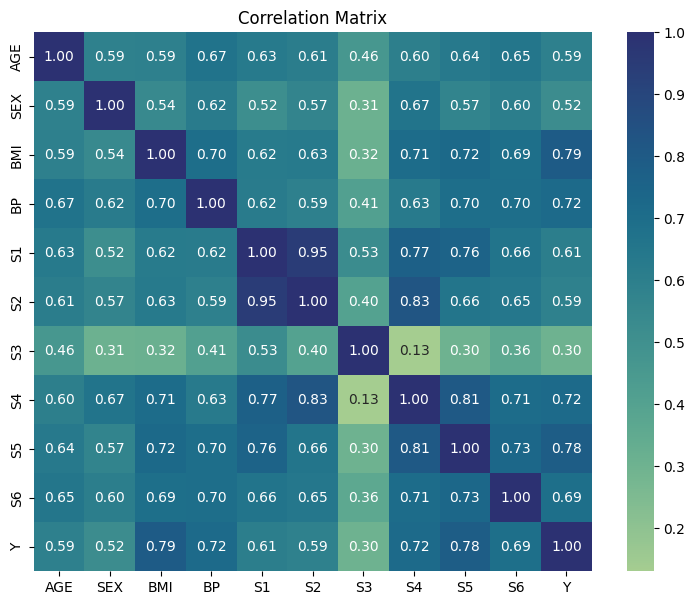

In [33]:
# corelation matrix
plt.figure(figsize=(9,7))
sns.heatmap((df_new.corr()+1)/2, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")

#### 💾 __About the DataSet__ :

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. 

__Note:__ that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1).

__Data Set Characteristics:__



| **Additional Details** | **Info** |
|------------------------|------------------------|
| **Number of Instances:** | 442                                       |
| **Number of Attributes:** | First 10 columns are numeric predictive values               |
| **Target:**             | Column 11 is a quantitative measure of disease progression one year after baseline |




[Original Source of Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)



__Attribute Information:__
- age = age in years
- sex
- bmi = body mass index
- bp = average blood pressure
- s1 tc = total serum cholesterol
- s2 ldl = low-density lipoproteins
- s3 hdl = high-density lipoproteins
- s4 tch = total cholesterol / HDL
- s5 ltg = possibly log of serum triglycerides level
- s6 glu = blood sugar level


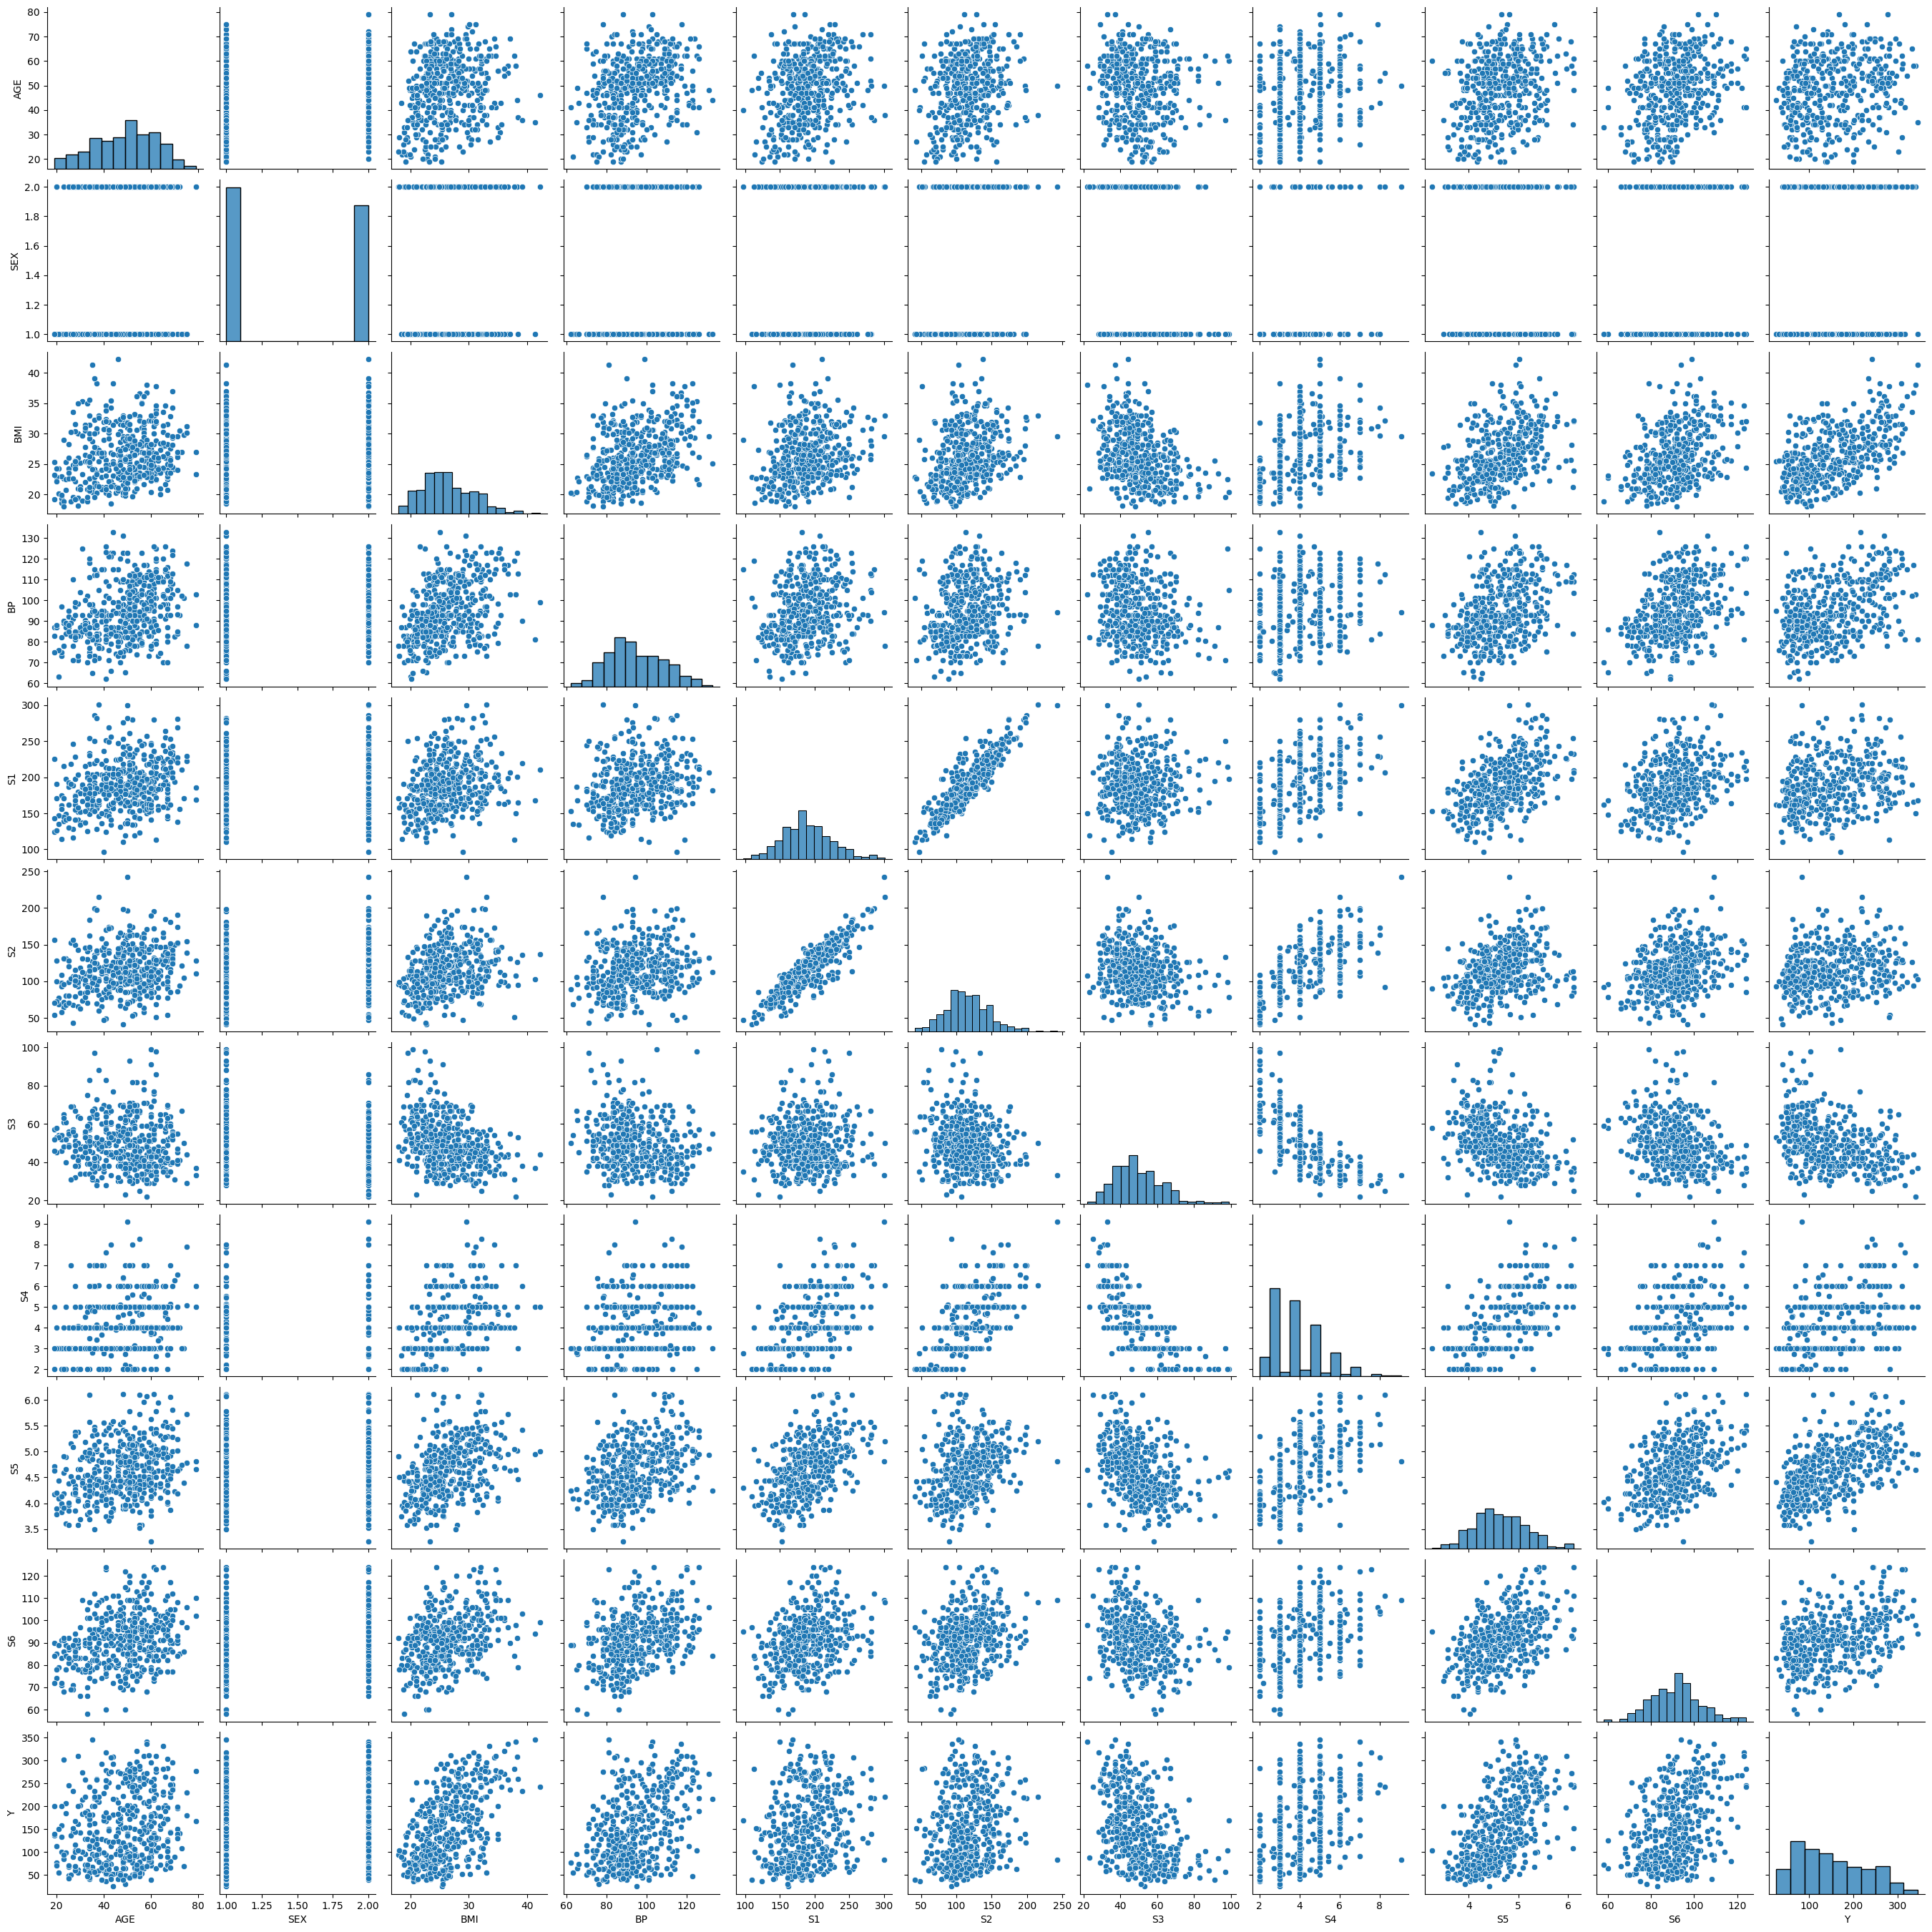

In [29]:
sns.pairplot(df_new)

_______

### 🔬 **Data Preprocessing:**

Based on the EDA, we can decide whether to drop or handle any missing values, scale features, and split the data into train and test sets.

Separating disease progration one year after baseline from the data. Meaning deviding the dataset into `X` and `y` form.

In [40]:
y = pd.DataFrame(df_new["Y"])
y.rename(columns={0: 'target'}, inplace=True)
print(y.head())
print(y.shape)

     Y
0  151
1   75
2  141
3  206
4  135
(442, 1)


In [39]:
X = df_new.drop(['Y', 'S1', 'S2', 'S3', 'S5'], axis=1)
print(X.head())
print(X.shape)

   AGE  SEX   BMI     BP   S4  S6
0   59    2  32.1  101.0  4.0  87
1   48    1  21.6   87.0  3.0  69
2   72    2  30.5   93.0  4.0  85
3   24    1  25.3   84.0  5.0  89
4   50    1  23.0  101.0  4.0  80
(442, 6)


Now, Lets Visialize the data for better interpretation. Plotting the data thta we would use in training the model. Following are the features that we would use...

- age
- sex (only for ploting)
- bmi
- bp
- s4 = total cholesteral
- s6 = blood suger level 

Text(0, 0.5, 'Target')

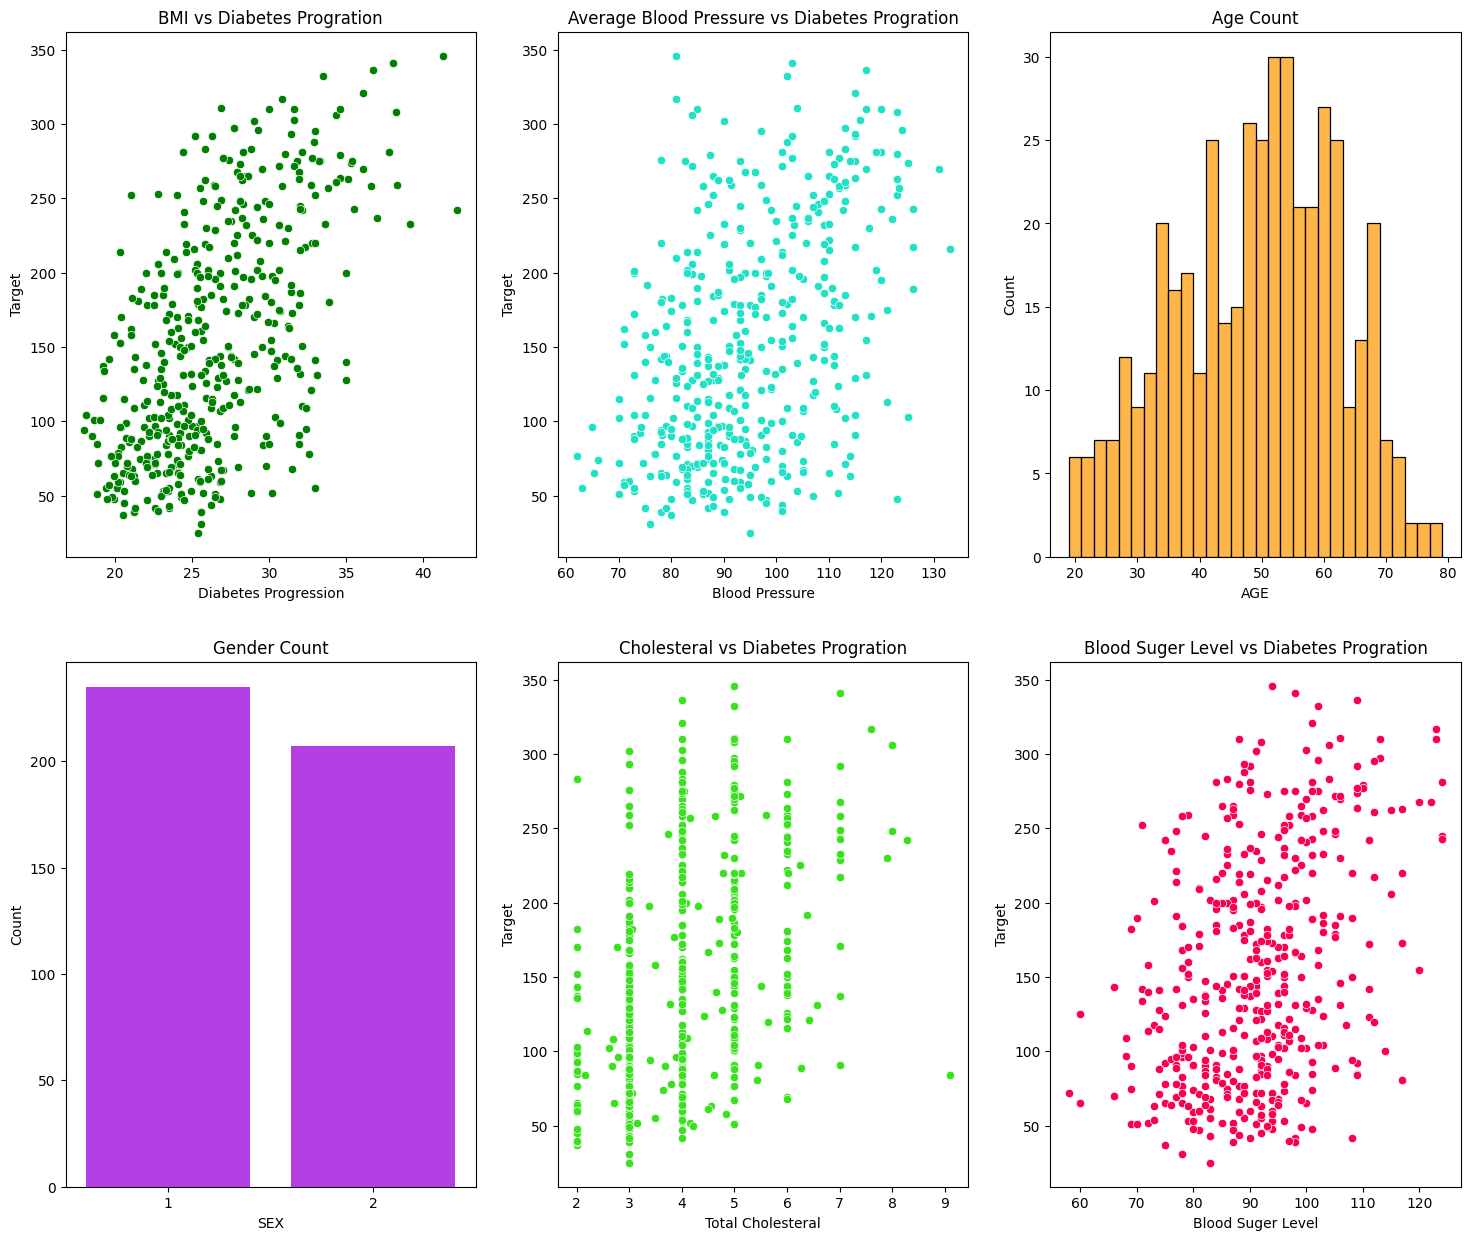

In [94]:
# visullize features that is used in model training
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.scatterplot(x=X["BMI"], y=y["Y"], color="g")
plt.title('BMI vs Diabetes Progration')
plt.xlabel('Diabetes Progression')
plt.ylabel('Target')

plt.subplot(2,3,2)
sns.scatterplot(x=X["BP"], y=y["Y"], color="#1FE1C6")
plt.title('Average Blood Pressure vs Diabetes Progration')
plt.xlabel('Blood Pressure')
plt.ylabel('Target')

plt.subplot(2,3,3)
sns.histplot(x=X["AGE"], bins=30, color='#FE9C0D')
plt.title('Age Count')
plt.xlabel('AGE')
plt.ylabel('Count')

plt.subplot(2,3,4)
sns.countplot(x=X["SEX"], color='#C023FF')
plt.title('Gender Count')
plt.xlabel('SEX')
plt.ylabel('Count')

plt.subplot(2,3,5)
sns.scatterplot(x=X["S4"], y=y["Y"], color="#3AE11F")
plt.title('Cholesteral vs Diabetes Progration')
plt.xlabel('Total Cholesteral')
plt.ylabel('Target')

plt.subplot(2,3,6)
sns.scatterplot(x=X["S6"], y=y["Y"], color="#FC0050")
plt.title('Blood Suger Level vs Diabetes Progration')
plt.xlabel('Blood Suger Level')
plt.ylabel('Target')

Now, lets split the dataset into **Train, Test, and Validation** set.

In [42]:
# splitting the data into TRAIN and TEST sections.
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.7, test_size=0.3, random_state=10)

### 👨🏼‍💻 **Modeling the Data:**

#### **1. Polynomial Regression**

In [92]:
degree1 = 3
degree2 = 5

model_p_1 = make_pipeline(PolynomialFeatures(degree1),LinearRegression())
model_p_1.fit(X_train, y_train)

model_p_2 = make_pipeline(PolynomialFeatures(degree2),LinearRegression())
model_p_2.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

#### **2. Decision Trees**

In [99]:
depth_tree_1 = 4
depth_tree_2 = 5

model_dt_1 = DecisionTreeRegressor(max_depth=depth_tree_1)
model_dt_2 = DecisionTreeRegressor(max_depth=depth_tree_2)

model_dt_1.fit(X_train, y_train)
model_dt_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

#### **3. K-Nearest Neighbors (KNN)**

In [100]:
k_value_1 = 7
k_value_2 = 9

model_knn_1 = KNeighborsRegressor(n_neighbors=k_value_1)
model_knn_2 = KNeighborsRegressor(n_neighbors=k_value_2)

model_knn_1.fit(X_train, y_train)
model_knn_2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

At this point, we have modeled the training data on different ML models with speciphic degrees and depth values. Now, it is time to perform cross validation on the data and extract some scores.  

### ✍🏼 **Cross-Validation:**

In [101]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

model_p_1_CV_output = cross_validate(model_p_1, X_train, y_train, scoring=scoring, cv=5)
model_p_2_CV_output = cross_validate(model_p_2, X_train, y_train, scoring=scoring, cv=5)

model_dt_1_CV_output = cross_validate(model_dt_1, X_train, y_train, scoring=scoring, cv=5)
model_dt_2_CV_output = cross_validate(model_dt_2, X_train, y_train, scoring=scoring, cv=5)

model_knn_1_CV_output = cross_validate(model_knn_1, X_train, y_train, scoring=scoring, cv=5)
model_knn_2_CV_output = cross_validate(model_knn_2, X_train, y_train, scoring=scoring, cv=5)


In [102]:
print(model_p_1_CV_output)

{'fit_time': array([0.00985265, 0.00800824, 0.008003  , 0.00704932, 0.0103209 ]), 'score_time': array([0.00254607, 0.00394511, 0.00312591, 0.        , 0.        ]), 'test_r2': array([-0.5305108 , -6.27784389,  0.23424732,  0.21348425, -1.2148149 ]), 'test_neg_mean_absolute_error': array([ -69.12772142, -114.45685073,  -54.6906386 ,  -61.10516142,
        -70.43077682]), 'test_neg_mean_absolute_percentage_error': array([-0.58914006, -0.87183127, -0.48520776, -0.53521836, -0.55505496])}


#### 📑 **Making Table of Values:**
Now construct the table of this values extracted by cross validation function.

In [104]:
model_p_1_CV_df = pd.DataFrame(model_p_1_CV_output)
model_p_2_CV_df = pd.DataFrame(model_p_2_CV_output)
model_dt_1_CV_df = pd.DataFrame(model_dt_1_CV_output)
model_dt_2_CV_df = pd.DataFrame(model_dt_2_CV_output)
model_knn_1_CV_df = pd.DataFrame(model_knn_1_CV_output)
model_knn_2_CV_df = pd.DataFrame(model_knn_2_CV_output)

In [106]:
model_p_1_CV_df

fit_time  score_time   test_r2  test_neg_mean_absolute_error   
0  0.009853    0.002546 -0.530511                    -69.127721  \
1  0.008008    0.003945 -6.277844                   -114.456851   
2  0.008003    0.003126  0.234247                    -54.690639   
3  0.007049    0.000000  0.213484                    -61.105161   
4  0.010321    0.000000 -1.214815                    -70.430777   

   test_neg_mean_absolute_percentage_error  
0                                -0.589140  
1                                -0.871831  
2                                -0.485208  
3                                -0.535218  
4                                -0.555055

Creating table from the values that we calculated above.

In [119]:
all = pd.concat([model_p_1_CV_df, model_p_2_CV_df, model_dt_1_CV_df, model_dt_2_CV_df, model_knn_1_CV_df, model_knn_2_CV_df])
all

fit_time  score_time      test_r2  test_neg_mean_absolute_error   
0  0.009853    0.002546    -0.530511                    -69.127721  \
1  0.008008    0.003945    -6.277844                   -114.456851   
2  0.008003    0.003126     0.234247                    -54.690639   
3  0.007049    0.000000     0.213484                    -61.105161   
4  0.010321    0.000000    -1.214815                    -70.430777   
0  0.049652    0.000000 -6623.892838                  -2791.005966   
1  0.050110    0.000000 -4691.598313                  -1761.918687   
2  0.050472    0.000000 -1439.437997                  -1676.818584   
3  0.051008    0.000000 -1245.547423                  -1611.219317   
4  0.052702    0.000000 -1622.331107                  -1255.502384   
0  0.000000    0.007996     0.218223                    -51.681332   
1  0.000000    0.004607     0.330010                    -44.604567   
2  0.000000    0.000000     0.436267                    -48.089762   
3  0.000000    0.008003     0.256053                    -56.773487   
4  0.000000    0.000000     0.172275                    -46.510627   
0  0.008022    0.000589     0.218284                    -52.559672   
1  0.000000    0.000000     0.346558                    -44.506739   
2  0.007552    0.002013     0.271503                    -55.650463   
3  0.000000    0.000000    -0.043781                    -64.306466   
4  0.000000    0.008131     0.018289                    -53.164372   
0  0.002012    0.000000     0.270435                    -52.935484   
1  0.000000    0.007995     0.338762                    -45.313364   
2  0.000000    0.005657     0.376077                    -51.665899   
3  0.000000    0.000000     0.292052                    -58.129032   
4  0.008003    0.000000     0.245689                    -50.594848   
0  0.000000    0.008570     0.250405                    -54.023297   
1  0.000000    0.000000     0.372148                    -45.284946   
2  0.007531    0.002023     0.364774                    -51.743728   
3  0.000000    0.000000     0.295657                    -57.200717   
4  0.008177    0.002020     0.266471                    -49.628415   

   test_neg_mean_absolute_percentage_error  
0                                -0.589140  
1                                -0.871831  
2                                -0.485208  
3                                -0.535218  
4                                -0.555055  
0                               -22.561506  
1                               -11.781084  
2                               -12.218642  
3                               -14.831784  
4                                -8.252423  
0                                -0.421094  
1                                -0.340695  
2                                -0.406769  
3                                -0.540410  
4                                -0.412456  
0                                -0.429645  
1                                -0.337049  
2                                -0.483747  
3                                -0.627601  
4                                -0.448233  
0                                -0.471218  
1                                -0.362187  
2                                -0.471965  
3                                -0.496926  
4                                -0.456193  
0                                -0.476411  
1                                -0.372969  
2                                -0.469422  
3                                -0.486015  
4                                -0.449215

Above is all the results that I got from the cross validation. According to that, the worst model for this data is `model_p_2_CV_df` which is **Polynomial Regression with degree 5**. The best model in this case would be `model_knn_2_CV_df` which is model **kNN with Degree 9**.

### __Visualization:__

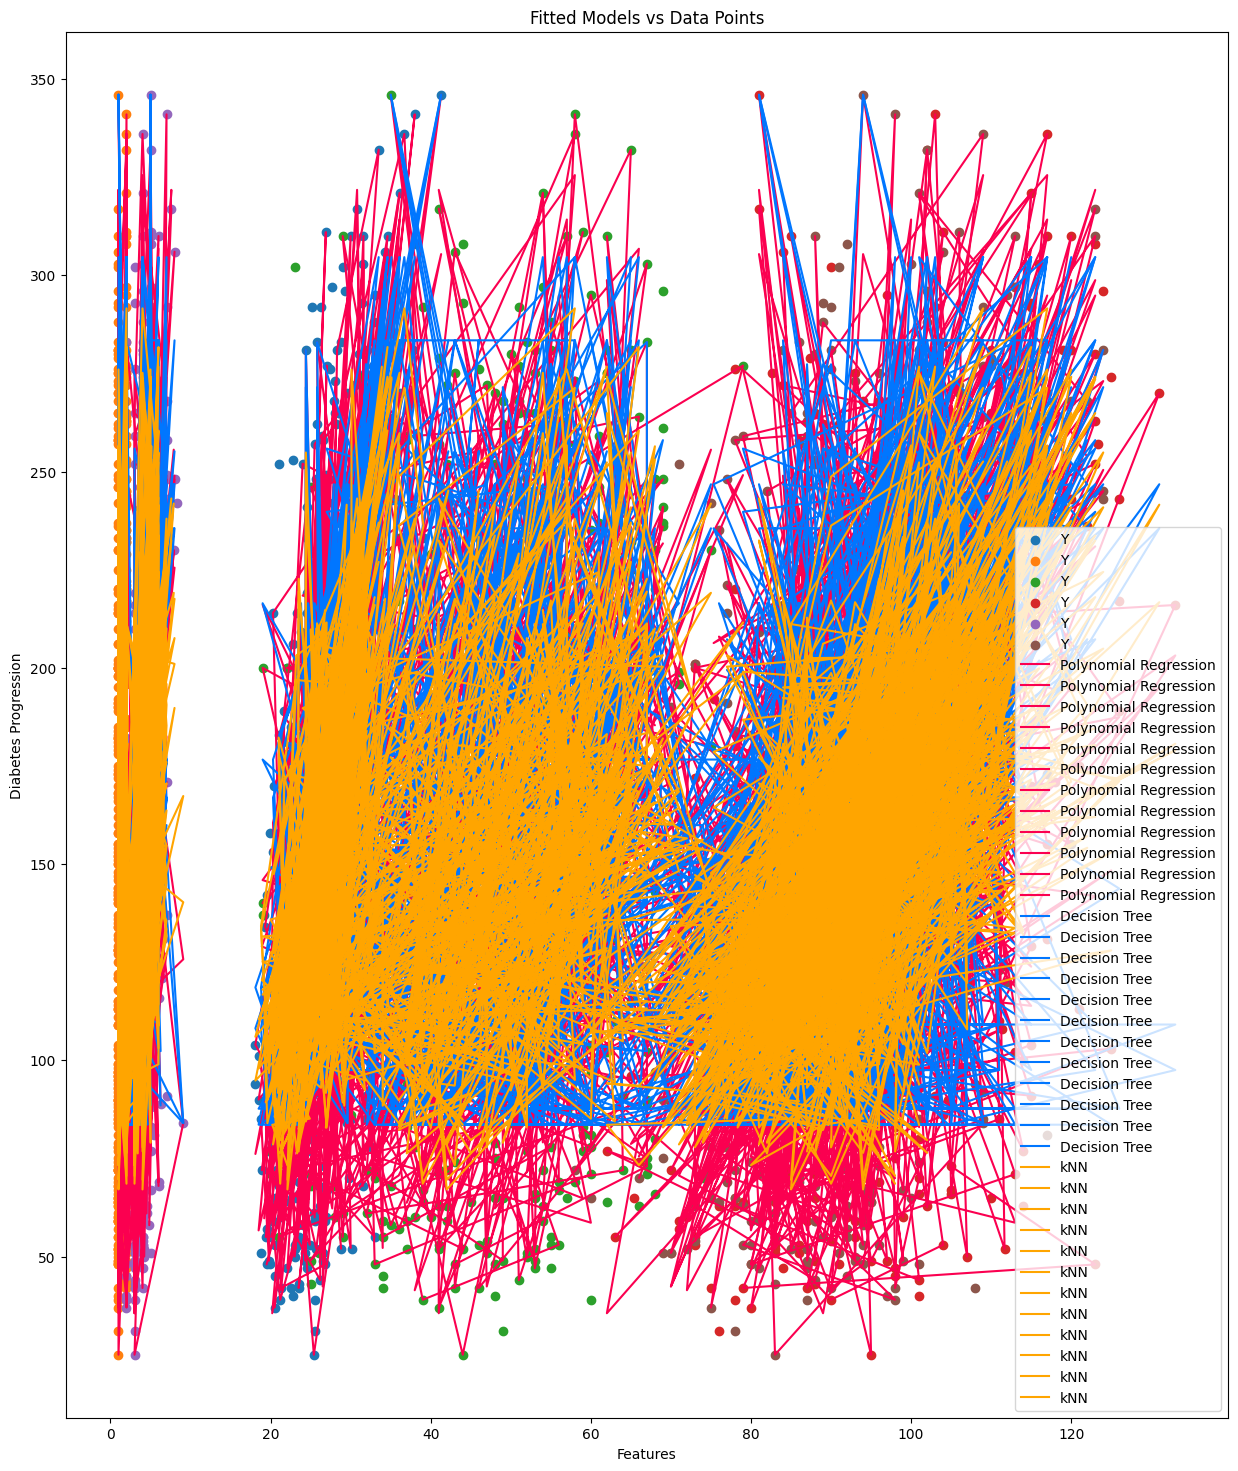

In [111]:
plt.figure(figsize=(15,18))
plt.scatter("BMI", "Y", data=df_new)
plt.scatter("SEX", "Y", data=df_new)
plt.scatter("AGE", "Y", data=df_new)
plt.scatter("BP", "Y", data=df_new)
plt.scatter("S4", "Y", data=df_new)
plt.scatter("S6", "Y", data=df_new)


plt.plot(X_train, model_p_1.predict(X_train), label='Polynomial Regression', color='#FB0050')
plt.plot(X_train, model_p_2.predict(X_train), label='Polynomial Regression', color='#FB0050')


plt.plot(X_train, model_dt_1.predict(X_train), label='Decision Tree', color='#0076FF')
plt.plot(X_train, model_dt_2.predict(X_train), label='Decision Tree', color='#0076FF')


plt.plot(X_train, model_knn_1.predict(X_train), label='kNN', color='#FFA500')
plt.plot(X_train, model_knn_2.predict(X_train), label='kNN', color='#FFA500')


plt.xlabel('Features')
plt.ylabel('Diabetes Progression')
plt.title('Fitted Models vs Data Points')
plt.legend()
plt.show()


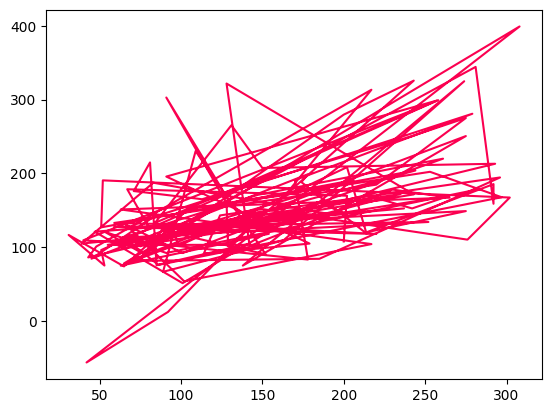

In [116]:
plt.scatter("BMI", "Y", data=df_new)
plt.scatter("SEX", "Y", data=df_new)
plt.scatter("AGE", "Y", data=df_new)
plt.scatter("BP", "Y", data=df_new)
plt.scatter("S4", "Y", data=df_new)
plt.scatter("S6", "Y", data=df_new)


plt.plot(y_test, model_p_1.predict(X_test), label='Polynomial Regression', color='#FB0050')
# plt.plot(X_train, model_p_2.predict(X_train), label='Polynomial Regression', color='#FB0050')


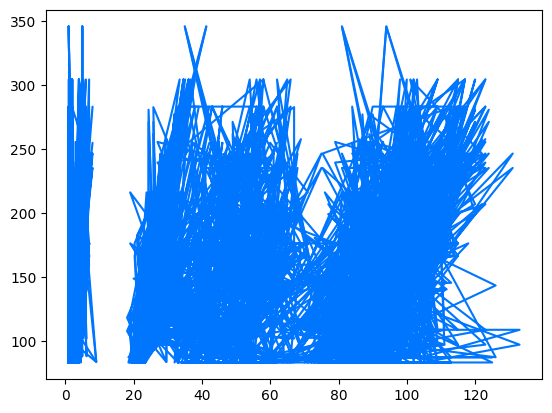

In [117]:
plt.plot(X_train, model_dt_1.predict(X_train), label='Decision Tree', color='#0076FF')
plt.plot(X_train, model_dt_2.predict(X_train), label='Decision Tree', color='#0076FF')

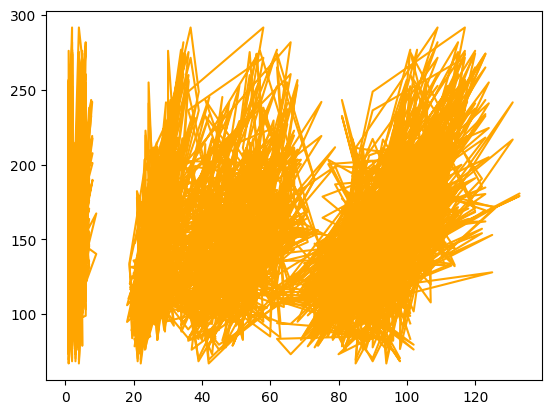

In [118]:
plt.plot(X_train, model_knn_1.predict(X_train), label='kNN', color='#FFA500')
plt.plot(X_train, model_knn_2.predict(X_train), label='kNN', color='#FFA500')


Although, this graphs are unclear and very hard to interprite. So, based on my observations I say that Knn would perform better in this situation.